In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv


In [2]:
data = pd.read_csv("/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv")

In [3]:
data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0
12527,120.726562,50.472256,0.346178,0.184797,0.769231,11.792603,17.662222,329.548016,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [5]:
import matplotlib.pyplot as plt

In [6]:
a = np.array(data['target_class'])

In [7]:
y_train = data['target_class']

In [8]:
keys = [None]*(len(data.columns) - 1)
for k in range(len(data.columns) - 1):
    keys[k] = data.columns[k]

In [9]:
x_train = data[keys]
for i in keys:
    x_train[i].fillna(x_train[i].mode()[0],inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [11]:
x_train.shape

(12528, 8)

In [12]:
import seaborn as sns


In [13]:
corrmat = data[keys].corr()

<AxesSubplot:>

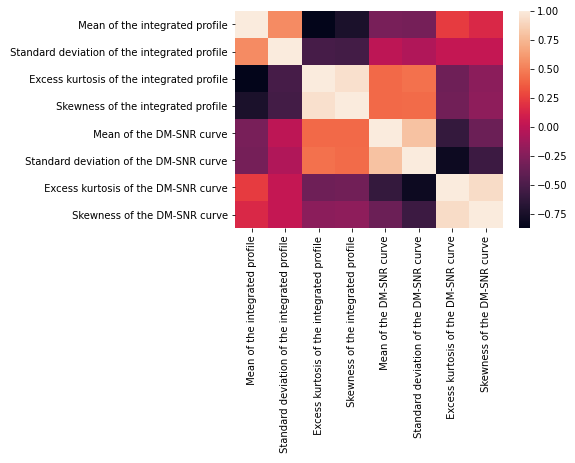

In [14]:
sns.heatmap(corrmat)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
s_scaler = StandardScaler()

In [17]:
x_train = s_scaler.fit_transform(x_train)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = keras.Sequential([
    layers.Dense(8,activation = 'relu', input_shape = [8]),
    layers.Dense(10,activation = 'relu'),
    #layers.Dense(10,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

In [34]:
from keras.utils.vis_utils import plot_model

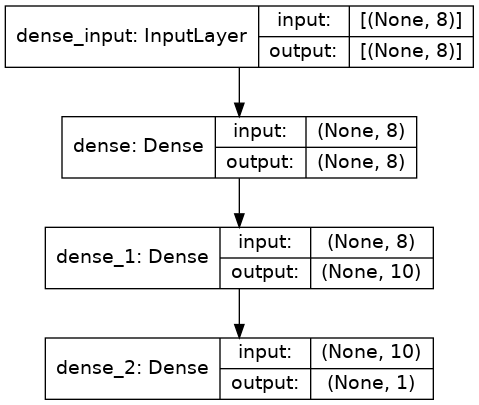

In [35]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 20,
    restore_best_weights = True
)

In [22]:
history = model.fit(
    x_train,y_train,
    batch_size = 8,
    epochs = 150,
    callbacks = [early_stopping],
    validation_split = 0.5
)

Epoch 1/150
783/783 [==============================] - 2s 2ms/step - loss: 0.3129 - accuracy: 0.9132 - val_loss: 0.1082 - val_accuracy: 0.9663
Epoch 2/150
783/783 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9663 - val_loss: 0.0914 - val_accuracy: 0.9717
Epoch 3/150
783/783 [==============================] - 1s 1ms/step - loss: 0.1011 - accuracy: 0.9711 - val_loss: 0.0860 - val_accuracy: 0.9729
Epoch 4/150
783/783 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9767 - val_loss: 0.0843 - val_accuracy: 0.9745
Epoch 5/150
783/783 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9749 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 6/150
783/783 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9773 - val_loss: 0.0818 - val_accuracy: 0.9751
Epoch 7/150
783/783 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0812 - val_accuracy: 0.9746

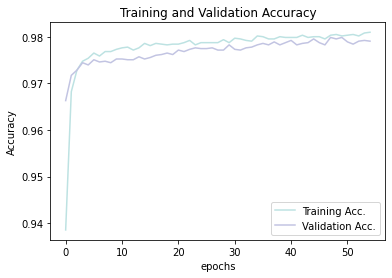

In [23]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:,'accuracy'],'#BDE2E2',label = 'Training Acc.')
plt.plot(history_df.loc[:,['val_accuracy']],'#C2C4E2',label = 'Validation Acc.')

plt.title('Training and Validation Accuracy')

plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix,classification_report 

In [25]:
y_pred = model.predict(x_train)
y_pred = (y_pred > 0.5)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     11375
         1.0       0.94      0.83      0.88      1153

    accuracy                           0.98     12528
   macro avg       0.96      0.91      0.93     12528
weighted avg       0.98      0.98      0.98     12528



In [26]:
for layer in model.layers:
    print(layer.name,layer)

dense <tensorflow.python.keras.layers.core.Dense object at 0x7f8fe3f37810>
dense_1 <tensorflow.python.keras.layers.core.Dense object at 0x7f8fe3a9ce10>
dense_2 <tensorflow.python.keras.layers.core.Dense object at 0x7f8fe3264350>


In [27]:
weights = model.get_weights()

In [28]:
weights

[array([[ 0.2766053 , -0.3602811 ,  0.9468137 ,  0.8196627 , -0.24522436,
          0.69157773,  0.29427403, -0.33058745],
        [ 0.30999255, -0.31345472,  0.15379716,  0.13787012, -0.43104324,
         -0.8018691 ,  0.20110607,  0.8376555 ],
        [ 1.1304618 , -0.5596146 , -0.17155449,  0.01893933,  0.0744622 ,
         -0.5508914 , -0.07035379, -0.9687908 ],
        [ 0.5270792 ,  0.91400295, -0.5716018 , -0.41440266, -1.0618047 ,
         -0.80591094,  0.70467067,  0.38594908],
        [ 0.03992692, -0.21629459, -0.5345437 ,  0.18949519, -0.7635642 ,
          0.59278584,  0.15889016, -0.6245742 ],
        [-0.26287416,  0.42348576, -0.10171446, -0.03663888, -0.49004954,
         -0.11495206, -0.13491108, -0.2303005 ],
        [-0.43796843,  0.3446575 ,  0.2760166 , -0.7774148 ,  0.23537575,
          0.17276698,  0.16514586, -0.28958654],
        [ 0.06869842,  0.07197399,  0.3481039 , -0.19372933, -0.7984687 ,
          0.6267206 ,  0.46593383, -0.58092976]], dtype=float32),

In [29]:
w1 = weights[0]
b1 = weights[1]
w2 = weights[2]
b2 = weights[3]
w3 = weights[4]
b3 = weights[5]

In [30]:
np.savetxt('/kaggle/working/w1.csv',w1,delimiter = ',')
np.savetxt('/kaggle/working/b1.csv',b1,delimiter = ',')
np.savetxt('/kaggle/working/w2.csv',w2,delimiter = ',')
np.savetxt('/kaggle/working/b2.csv',b2,delimiter = ',')
np.savetxt('/kaggle/working/w3.csv',w3,delimiter = ',')
np.savetxt('/kaggle/working/b3.csv',b3,delimiter = ',')

In [31]:
np.savetxt('/kaggle/working/x_train.csv',x_train,delimiter = ',')
np.savetxt('/kaggle/working/y_train.csv',y_train,delimiter = ',')

In [32]:
np.savetxt('/kaggle/working/y_pred.csv',y_pred,delimiter = ',')